# 17 - Optimization and Gradient Descent

## 17.1 - Introduction to Optimization

Optimization refers to finding the best solution among a set of feasible options. In mathematical terms, it involves maximizing or minimizing an objective function while satisfying certain constraints. The goal is to find the optimal solution that either maximizes profits, minimizes costs, or achieves some other desired outcome.

### Convex Functions and Convex Optimization

A function $f(x)$ is convex if, for any two points $x_1$ and $x_2$ in its domain and any $\lambda$ in the interval $[0, 1]$, the following inequality holds:

$$ f(\lambda x_1 + (1 - \lambda) x_2) \leq \lambda f(x_1) + (1 - \lambda) f(x_2) $$

Properties of convex functions:
1. **Graph Below Chords**: For any two points $x$, $y \in \mathbb{R}^d$ and for any $\lambda \in [0, 1]$, we have

    $$ f(\lambda x + (1 - \lambda) y) \leq \lambda f(x) + (1 - \lambda)f(y) $$

    The property implies that the graph of the function lies below the line segment (or chord) connecting $f(x)$ and $f(y)$, which is a signature characteristic of convex functions.
2. **Convex Epigraph**: The epigraph of a function $f$, defined as $\text{epi}(f) = {(x,z) \in \mathbb{R}^d \times \mathbb{R}: z \geq f(x)}$, is a convex set if $f$ is convex. For any $(x_1, z_1), (x_2, z_2) \in \text{epi}(f)$ and for any $t \in [0, 1]$.

    $$ (tx_1 + (1 - t)x_2, tz_1 + (1 - t)z_2) \in \text{epi}(f) $$

    This reflects that any vertical slice above the graph of $f$ forms a convex set.
3. **Non-Negative Second Derivative**: For twice-differentiable functions, convexity is equivalent to the condition that the Hessian matrix $\nabla^2 f(x)$, the matrix of second partial derivatives, is positive semidefinite across its domain:

    $$ \nabla^2 f(x) \geq 0 \ \ \ \ \ \ \ \text{for all } x \in \mathbb{R}^d $$

    This implies that the second derivative (or the curvature) of $f$ is non-negative, thereby ensuring the function curves upwards, which precludes the presence of local maxima outside of global minima.

### Convex Optimization Problems

A convex optimization problem is a mathematical optimization problem where both the objective function and the feasible region defined by the constraints are convex.

$$ \text{minimize } f(x) $$

$$ \text{subject to } g_i(x) \leq 0, \ \ \ \ \ i = 1, 2, \dots, m $$

$$ h_j (x) = 0, \ \ \ \ \ j = 1, 2, \dots, n $$

Here, $f(x)$ is the convex objective function, $g_i(x)$ are convex inequality constraints, and $h_j(x)$ are affine equality constraints.

### Importance of Convexity in Optimization

- Convex optimization problems have a unique global minimum due to the convexity of the objective function and the feasible region.
- Efficient algorithms such as Gradient Descent can solve convex optimization problems in polynomial time, making them computationally tractable.

### Advantages of Convex Optimization

- **Reliability**: Convex optimization guarantees a unique global minimum, ensuring reliable and consistent results.
- **Efficiency**: Efficient algorithms can solve convex optimization problems in polynomial time, making them suitable for large-scale optimization tasks.
- **Wide Applicability**: Convex optimization techniques are applicable to a wide range of real-world problems in various domains, including machine learning, finance, engineering, and operations research.

## 17.2 - Gradient Descent

**Gradient Descent** is a versatile optimization technique used to minimize a differentiable function $f: \mathbb{R}^d \rightarrow \mathbb{R}$. It aims to find either the minimum value of $f(x)$ or the argument $x^*$ that achieves this minimum. This approach is particularly effective for convex functions where a closed-form solution is unavailable.

The algorithm iteratively adjusts the parameter vector $x$ in the direction opposite of the gradient of the function $f$. At each iteration, the parameter update rule is

$$ x^{(k + 1)} := x^{(k)} - \alpha \nabla f(x^{(k)}) $$

Here, $\alpha$ is the learning rate, controlling the size of the step taken in each iteration. The process continues until a stopping criterion is met, typically when the norm of the gradient becomes sufficiently small.

### Gradient Descent Algorithm

1. **Initialization**: Start with an initial parameter vector $x_0$ in $\mathbb{R}^d$.
2. **Iterative Update**: Repeat until convergence:

$$ x^{(k+1)} := x^{(k)} - \alpha \nabla f(x^{(k)}) $$

3. **Convergence Check**: Stop when $|| \nabla f(x^{(k)})|| \leq \epsilon$.
4. **Return**: The final parameter vector $x^{(k)}$.

The choice of the learning rate $\alpha$ is critical. While a fixed learning rate is common, it must be carefully tuned. A large value can cause the algorithm to overshoot the minimum, while a small value may slow down convergence. Finding the right balance is essential for efficient optimization.

In practice, Gradient Descent is widely used across various domains, including machine learing, optimization, and numerical analysis, to solve complex optimization problems and find optimal solutions efficiently.

### Learning Rate Adjustment

Selecting an appropriate learning rate $\alpha$ for Gradient Descent is crucial for effective optimization. One common strategy is to experiment with a few fixed values, erring on the side of caution. Monitoring the behavior of the objective function $f(x^{(k)})$ during iterations provides valuable insights. As long as $f(x^{(k)})$ consistently decreases, the algorithm is likely converging towards a minimum. This adaptive approach also serves as an indicator of potential multiple local minima, as the algorithm may converge to different locations.

Alternatively, employing the `backtracking line search` algorithm automates the adjustment of the learning rate $\alpha$. This technique utilizes a fixed parameter $\beta$ within the range $(0, 1)$, typically chosen between $(0.1, 0.8)$, with $\beta = \frac{3}{4}$ being a common choice. Initially, the process begins with a relatively large step size, such as $\alpha = 1$. Subsequently, at each iteration of the gradient descent, if the condition

$$ f(x - \alpha \nabla f(x)) > f(x) - \frac{\alpha}{2} ||\nabla f(x)|| $$

holds true, the learning rate $\alpha$ is updated as $\alpha = \beta \cdot \alpha$. This adaptive adjustment allows the learning rate to gradually decrease over the course of the algorithm, promoting convergence. Particularly in cases where the objective function $f$ exhibits strong convexity, this approach ensures that the learning rate eventually decreases sufficiently to meet the condition for linear convergence.

### Example

Given the function $f(x, y) = (x - 2)^2 + 0.8(y - 3)^2 + 0.25xy$, compute the gradient, run GradientDescent for 20 iterations with an initial position of $(9, 0.5)$, while varying the learning rate in the range $\alpha = 0.01, 0.1, 0.2, 0.3, 0.5, 0.6$.

**Gradient Descent Algorithm**
- **Initialize**: Start with an initial position $(x_0, y_0) = (9, 0.5)$.
- **Compute Gradient**: Compute the gradient $\nabla f(x, y)$ of the function $f(x, y)$ with respect to $x$ and $y$.
- **Update Parameters**: Update the parameters $x$ and $y$ using the Gradient Descent update rule:

    $$ x_{k+1} = x_k - \alpha \frac{\delta f}{\delta x}(x_k, y_k) $$

    $$ y_{k+1} = y_k - \alpha \frac{\delta f}{\delta y}(x_k, y_k) $$

- **Repeat**: Repeat steps 2 and 3 for a total of 20 iterations.
- **Output**: The final parameter values $(x_{20}, y_{20})$ after 20 iterations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x - 2)**2 + 0.8*(y - 3)**2 + 0.25*x*y

def grad_f(x, y):
    grad_x = 2*(x - 2) + 0.25*y
    grad_y = 0.8 * 2 * (y - 3) + 0.25 * x
    return np.array([grad_x, grad_y])

In [ ]:
def gradient_descent(initial_position, learning_rate, num_iterations):
    x, y = initial_position
    trace_x, trace_y = [x], [y]
    for i in range(num_iterations):
        grad_x, grad_y = grad_f(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        trace_x.append(x)
        trace_y.append(y)
    final_gradient_norm = np.sqrt(grad_x**2 + grad_y**2)
    return trace_x, trace_y, final_gradient_norm

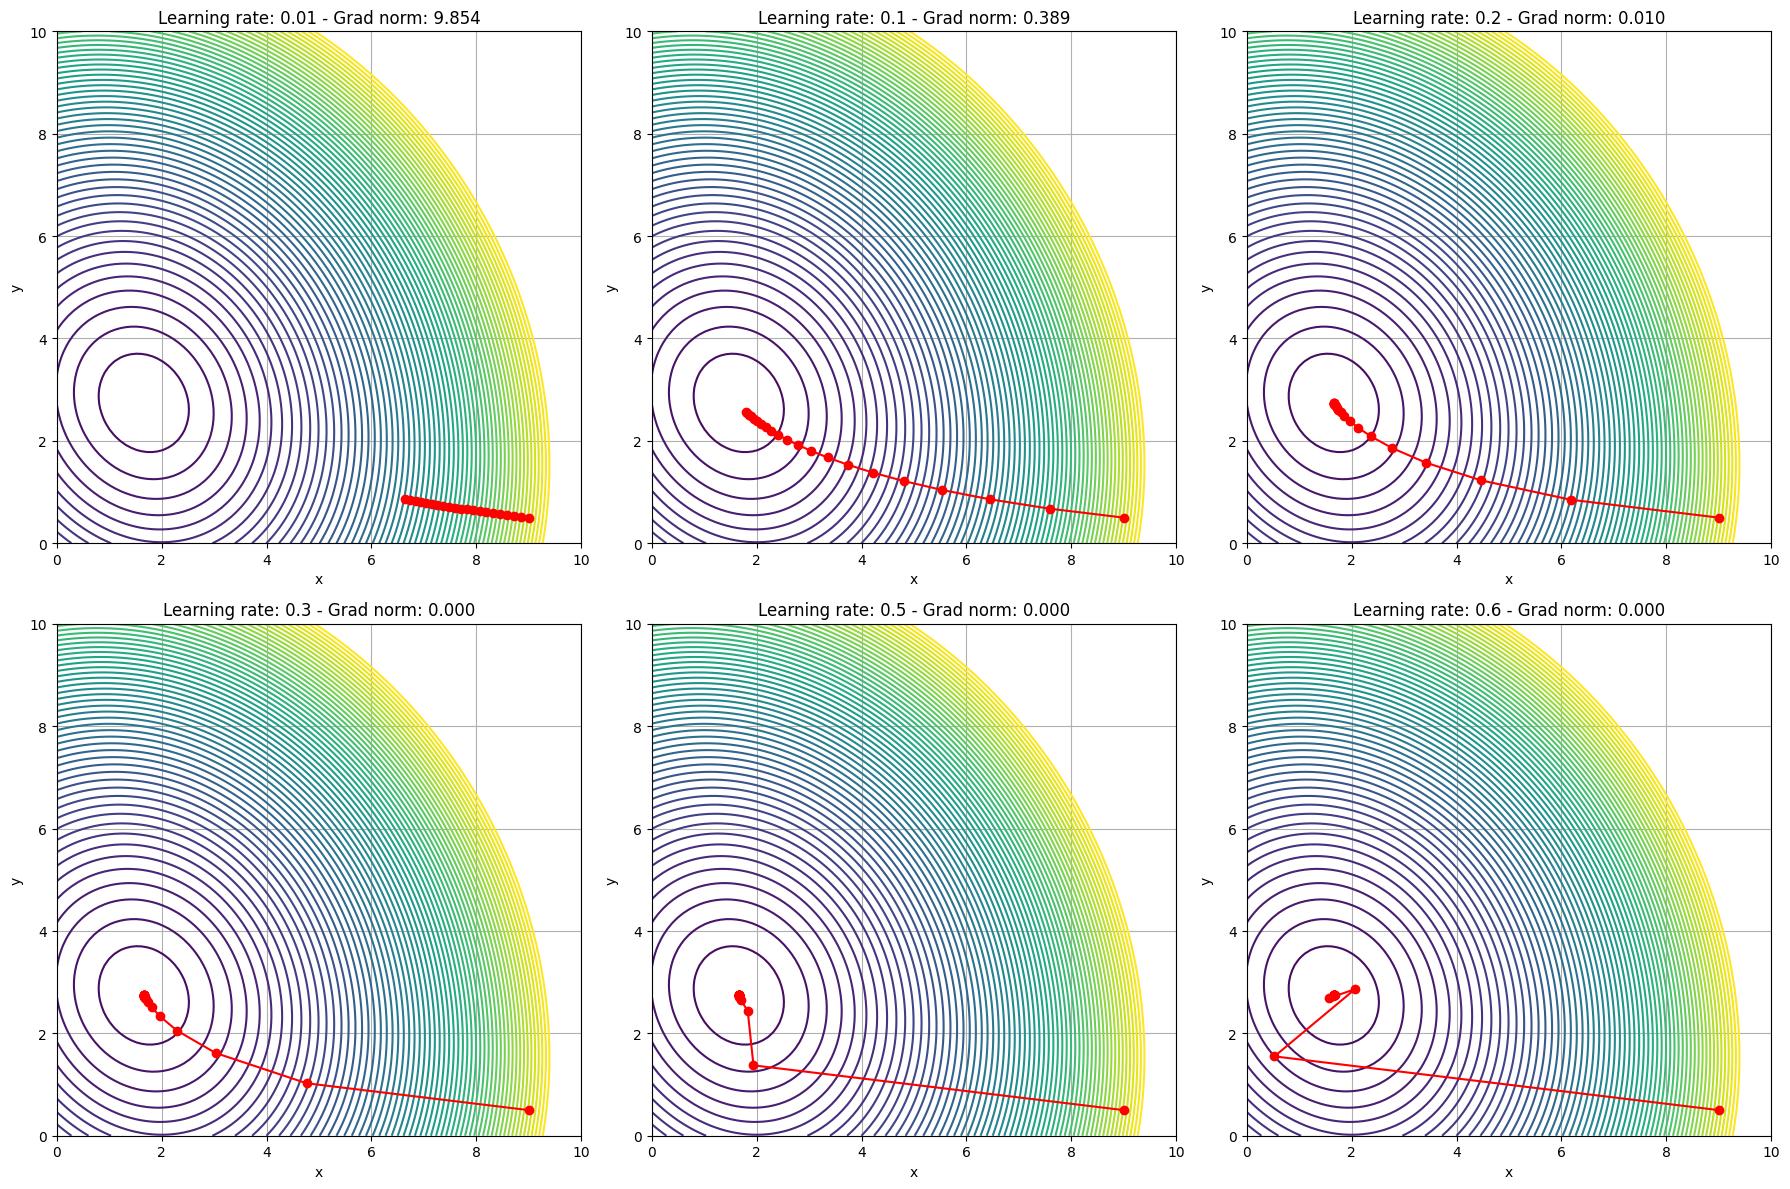

In [ ]:
initial_position = (9, 0.5)
num_iterations = 20
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.5, 0.6]

# Prepare for contour plot
xlist = np.linspace(0, 10, 100)
ylist = np.linspace(0, 10, 100)
x, y = np.meshgrid(xlist, ylist)
z = f(x, y)
levels = np.linspace(0, 60, 60)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
for i, alpha in enumerate(learning_rates):
    trace_x, trace_y, final_gradient_norm = gradient_descent(
        initial_position, alpha, num_iterations
    )
    row = i // 3
    col = i % 3
    axs[row, col].contour(x, y, z, levels=levels)
    axs[row, col].plot(trace_x, trace_y, "r-", marker="o")
    axs[row, col].set_title(
        f"Learning rate: {alpha} - Grad norm: {final_gradient_norm:.3f}"
    )
    axs[row, col].set_xlabel("x")
    axs[row, col].set_ylabel("y")
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()